In [7]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4                             # No. of agents
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step
config = 'SH'

T_lst = [1,5,10,15,20,25,30]

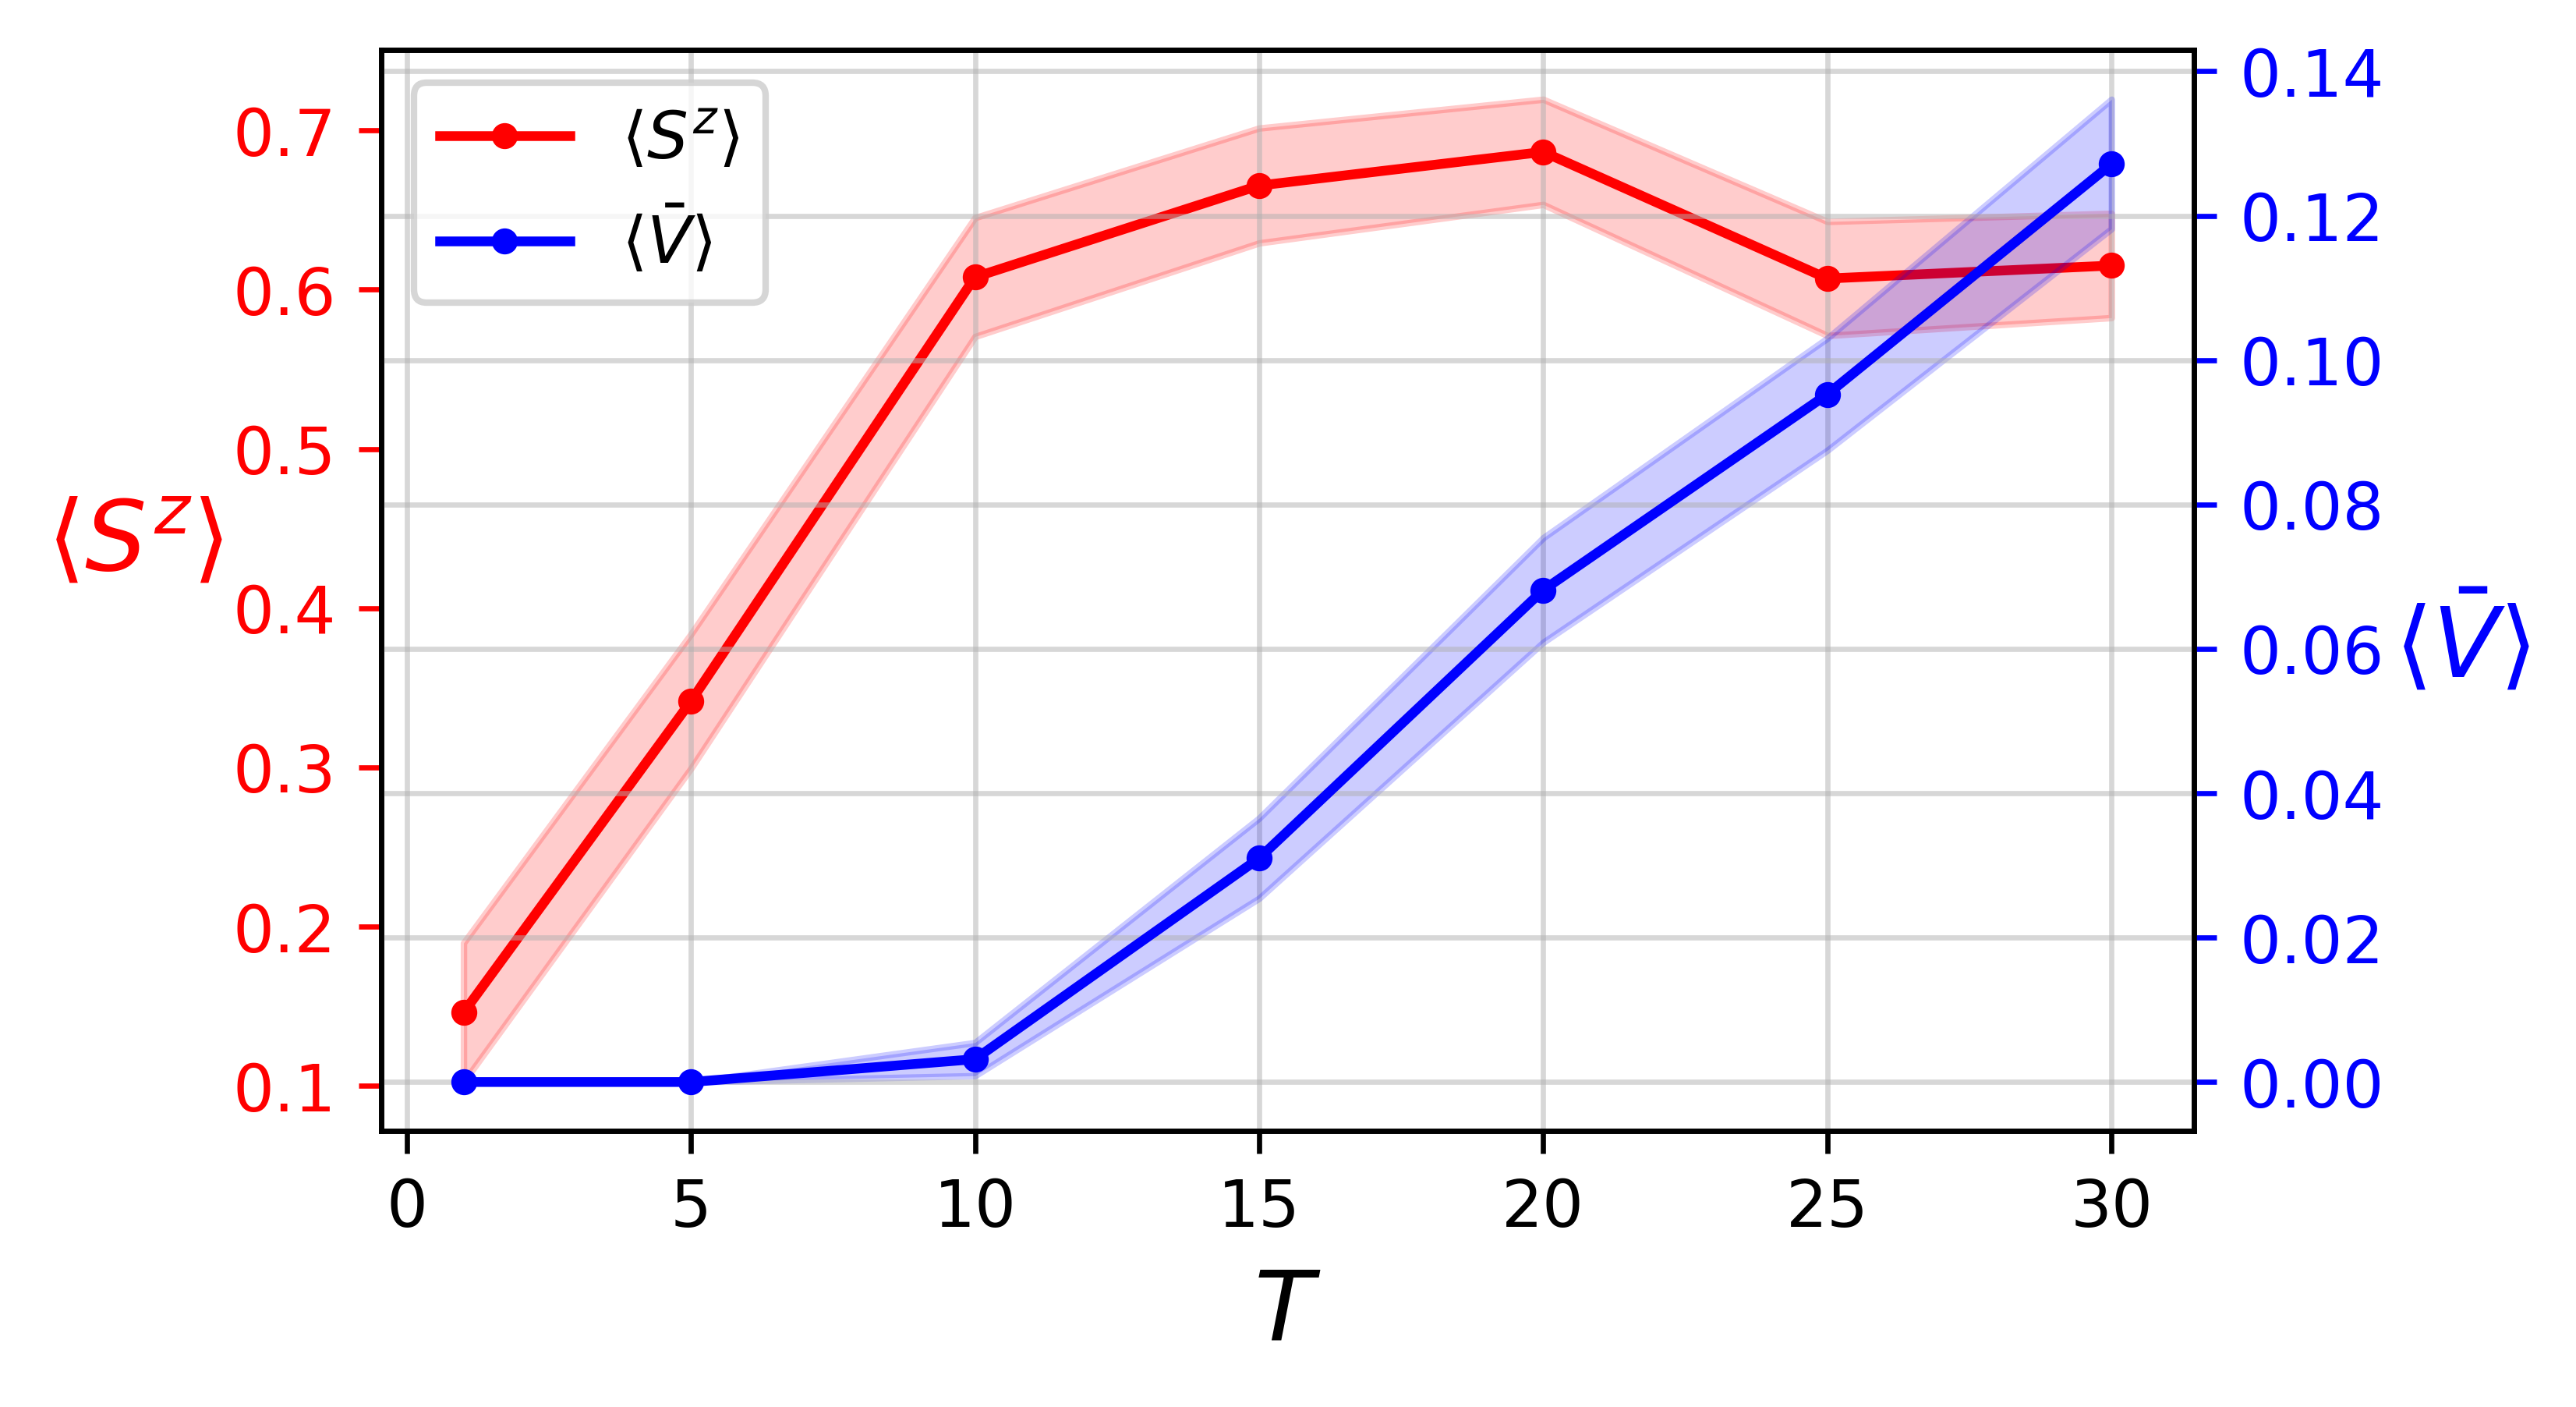

In [6]:
fig, axs = plt.subplots(figsize=(5,3), dpi=600)

SH_avg = []; SH_std = []
SHV_avg = []; SHV_std = []

for T in T_lst:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(2*np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SHV_avg.append(lst[-1, :].mean())
  SHV_std.append(2*np.std(lst[-1, :])/(ENS_step**0.5))
SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)
SHV_avg = np.array(SHV_avg)
SHV_std = np.array(SHV_std)

line1 = axs.plot(T_lst, SH_avg, marker='.', color='red', label=r'$\langle S^z \rangle$')
axs.fill_between(T_lst, SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)
axs.set_xlabel(r"$T$", fontsize=15)
axs.set_ylabel(r'$\langle S^z \rangle$', color='red', fontsize=15, rotation=0, labelpad=15)
axs.tick_params(axis="y", colors="red")

ax2 = axs.twinx()
line2 = ax2.plot(T_lst, SHV_avg, marker='.', color='blue', label=r'$\langle \bar V \rangle$')
ax2.fill_between(T_lst, SHV_avg - SHV_std, SHV_avg + SHV_std, color='blue', alpha = 0.2)
ax2.set_xlabel(r"$T$")
ax2.set_ylabel(r'$\langle \bar V \rangle$', color='blue', fontsize=15, rotation=0, labelpad=12)
ax2.tick_params(axis="y", colors="blue")
axs.grid(True, axis='x', alpha=0.5)
ax2.grid(alpha=0.5)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

# plt.savefig('FigTfinal.pdf', bbox_inches = 'tight')